In [1]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from intent_model.preprocessing.preprocess import read_data

In [2]:
warnings.filterwarnings('ignore')

In [3]:
PATH = 'data/dataset_v3'

data = read_data(path=PATH, melt_dicts=True)

Features: 90; Sessions: 90


Reading and processing data...: 100%|███████████| 90/90 [14:38<00:00,  9.76s/it]


Removing duplicated data...
Done.


In [4]:
len(data)

10089597

In [5]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089597 entries, 0 to 10089596
Data columns (total 20 columns):
 #   Column                 Non-Null Count     Dtype         
---  ------                 --------------     -----         
 0   valid_date             10089597 non-null  object        
 1   ts                     10089597 non-null  datetime64[ns]
 2   sessionuuid            10089597 non-null  object        
 3   customer_id            10089597 non-null  int64         
 4   booking_id             10089597 non-null  int64         
 5   latitude               10089597 non-null  float64       
 6   longitude              10089597 non-null  float64       
 7   is_trip_ended          10089597 non-null  int64         
 8   quantile               10089597 non-null  float64       
 9   weekday                10089597 non-null  object        
 10  minutes_sin            10089597 non-null  float64       
 11  minutes_cos            10089597 non-null  float64       
 12  rh          

In [6]:
data.head()

,valid_date,ts,sessionuuid,customer_id,booking_id,latitude,longitude,is_trip_ended,quantile,weekday,minutes_sin,minutes_cos,rh,norm_week,norm_hour,min_dist_to_known_loc,known_loc_occ,is_freq,dist_to_most_freq,rh_frac
0,2023-05-23,2023-05-23 04:00:01,1669F369-7554-48CF-B3FF-0550B23F5233,55218057,0,25.110,55.178,0,0.93,2,0.866025,0.5,0,0.555136,0.000000,0.000000,0.741935,0,0.000000,1.000000
1,2023-05-23,2023-05-23 04:00:01,502DEA41-AD08-4C0B-9240-9E3840159680,9226442,0,25.160,55.302,0,0.84,2,0.866025,0.5,0,0.156174,0.200000,0.087006,0.800000,0,0.087006,1.000000
2,2023-05-23,2023-05-23 04:00:02,71F539C3-B172-418A-BF31-462229124F63,53665656,0,25.228,55.282,0,0.91,2,0.866025,0.5,0,0.164957,0.000000,0.000000,0.720000,0,0.000000,1.000000
3,2023-05-23,2023-05-23 04:00:02,c41f4869-1898-4115-b690-b05cc3dafb85,41318473,0,25.202,55.376,0,0.98,2,0.866025,0.5,0,0.404368,0.056254,0.003606,0.088235,0,0.061205,0.957746
4,2023-05-23,2023-05-23 04:00:03,E122AAF0-C492-46DE-8E17-83BE3DD63C9C,61907878,0,25.165,55.406,0,0.92,2,0.866025,0.5,0,0.156174,0.262613,0.001000,0.100000,0,0.010000,0.857143


In [7]:
data.to_parquet('data/dataset_v3/dataset.pq')

In [8]:
sub = data[['ts']].assign(sessions=1).copy()
sub['ts'] = sub['ts'].astype(str).apply(lambda x: x.split(' ')[0])
sub = sub.groupby(by='ts').sum()

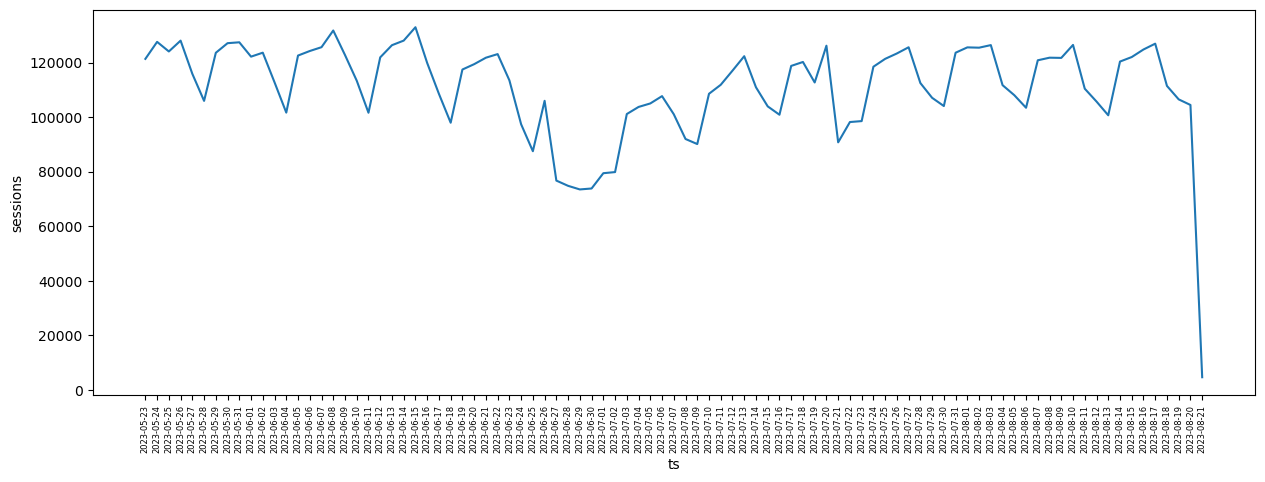

In [9]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=sub, x='ts', y='sessions')
plt.xticks(rotation=90, fontsize=6)
plt.show()